# DA Final project: Nobel Prize Winners: 1901 to 2023

## Group Number: 36

### Presented by:
* Sarah Bonnan
* Haim Amzallag
* Guy Hasson





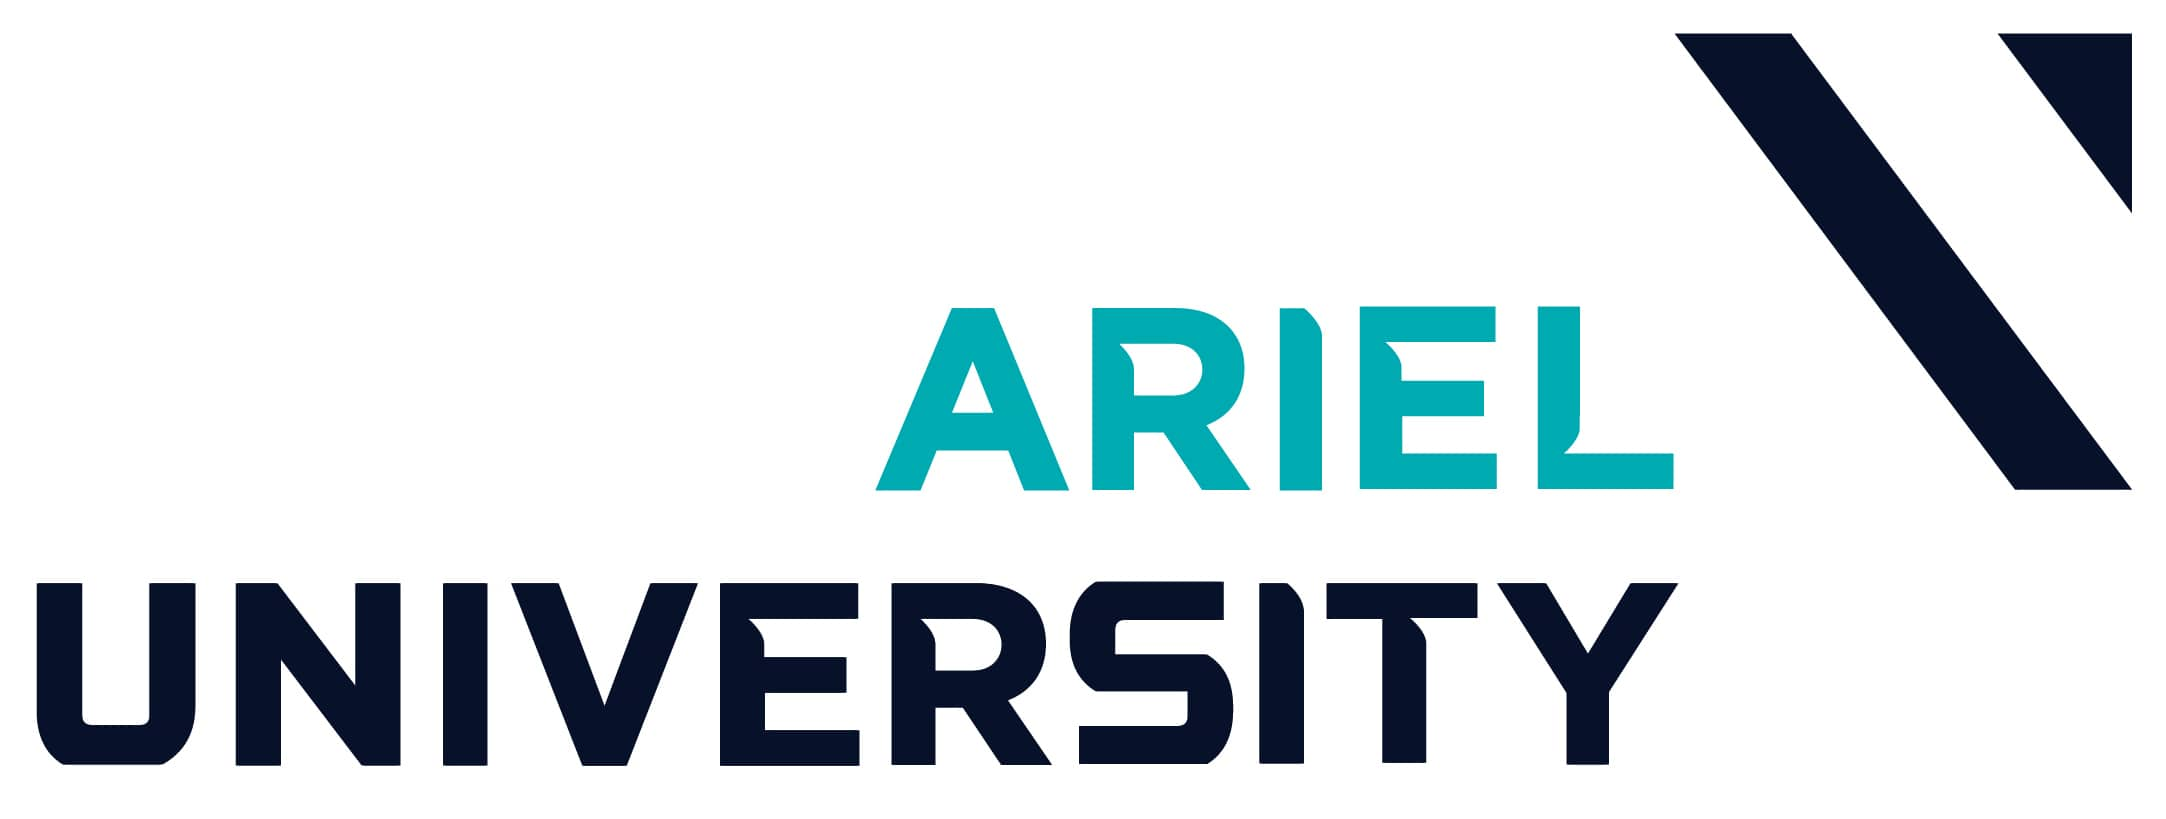

In [1]:
from IPython import display
from IPython.display import HTML, Image
display.Image("https://www.ariel.ac.il/sites/Navon-Venezia/img/Ariel_U_logo2.jpg")

<b id="Top"> </b>  

1. [Relevant libraries](#1)
2. [dtypes & info](#2)
3. [Noisy data](#3)
4. [conditional selection](#4)


---

### Source and information on the data :
 <br>Source:  [Kaggle](https://www.kaggle.com/datasets/sazidthe1/nobel-prize-data)
The 'Nobel Prize Winners: 1901 to 2023' Dataset covers a wide rande of variables related to the  international award Nobel Prize .
It includes details such as the Category of the Nobel Prize, the Year in which the Nobel Prize was awarded, the Share of the prize received by the laureate, the Full name, the Gender of the laureates, etc.

In [3]:
#!pip install geopandas
#!pip install folium
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image
from matplotlib.patches import Patch


In [85]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import requests
from datetime import datetime
from IPython.display import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from datetime import datetime

In [86]:
url = 'https://raw.githubusercontent.com/SarahB21/Project2024/main/nobel_laureates_data.csv'
df = pd.read_csv(url)
nobel_data=df.copy()


In [87]:
# nobel_data.info()
nobel_data.shape

(1000, 16)

In [88]:
nobel_data.head()

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY


### 1. Wrangling data

In [89]:
category_unique = nobel_data['category'].unique()
print(category_unique)


['medicine' 'economics' 'peace' 'literature' 'chemistry' 'physics']


In [90]:
nobel_data.drop_duplicates(subset=['year', 'category', 'motivation', 'prizeShare', 'laureateID',
       'fullName', 'gender', 'born', 'bornCountry', 'bornCity', 'died',
       'diedCountry', 'diedCity', 'organizationName', 'organizationCountry',
       'organizationCity'], inplace=True)
nobel_data.shape

(1000, 16)

In [91]:
nobel_data.rename(columns=lambda x: x.capitalize(), inplace=True)


In [92]:
nobel_data.head(2)

,Year,Category,Motivation,Prizeshare,Laureateid,Fullname,Gender,Born,Borncountry,Borncity,Died,Diedcountry,Diedcity,Organizationname,Organizationcountry,Organizationcity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA


In [93]:
nobel_data.columns

Index(['Year', 'Category', 'Motivation', 'Prizeshare', 'Laureateid',
       'Fullname', 'Gender', 'Born', 'Borncountry', 'Borncity', 'Died',
       'Diedcountry', 'Diedcity', 'Organizationname', 'Organizationcountry',
       'Organizationcity'],
      dtype='object')

In [94]:
nobel_data.isnull().sum()

Year                     0
Category                 0
Motivation               0
Prizeshare               0
Laureateid               0
Fullname                 0
Gender                   0
Born                     0
Borncountry             30
Borncity                34
Died                    30
Diedcountry            348
Diedcity               354
Organizationname       264
Organizationcountry    267
Organizationcity       269
dtype: int64

In [95]:
nobel_data['Died'].fillna('UNREPORTED', inplace=True)
nobel_data['Borncountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Borncity'].fillna('UNREPORTED', inplace=True)
nobel_data['Diedcountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Diedcity'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationname'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationcountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationcity'].fillna('UNREPORTED', inplace=True)
 
nobel_data.dtypes

Year                    int64
Category               object
Motivation             object
Prizeshare              int64
Laureateid              int64
Fullname               object
Gender                 object
Born                   object
Borncountry            object
Borncity               object
Died                   object
Diedcountry            object
Diedcity               object
Organizationname       object
Organizationcountry    object
Organizationcity       object
dtype: object

In [96]:
#Faire afficher sans array

In [97]:
nobel_data['Gender'].unique()

array(['female', 'male', 'org'], dtype=object)

In [98]:
nobel_data[nobel_data.loc[:,'Gender'] == 'org']

,Year,Category,Motivation,Prizeshare,Laureateid,Fullname,Gender,Born,Borncountry,Borncity,Died,Diedcountry,Diedcity,Organizationname,Organizationcountry,Organizationcity
16,2022,peace,The Peace Prize laureates represent civil soci...,3,1020,Center for Civil Liberties,org,2007-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
17,2022,peace,The Peace Prize laureates represent civil soci...,3,1019,Memorial,org,1987-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
41,2020,peace,for its efforts to combat hunger for its contr...,1,994,World Food Programme,org,1961-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
78,2017,peace,for its work to draw attention to the catastro...,1,948,International Campaign to Abolish Nuclear Weap...,org,2007-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
102,2015,peace,for its decisive contribution to the building ...,1,925,National Dialogue Quartet,org,13-07-2013,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
130,2013,peace,for its extensive efforts to eliminate chemica...,1,893,Organisation for the Prohibition of Chemical W...,org,1997-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
140,2012,peace,for over six decades contributed to the advanc...,1,881,European Union,org,1952-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
202,2007,peace,for their efforts to build up and disseminate ...,2,818,Intergovernmental Panel on Climate Change,org,1988-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
208,2006,peace,for their efforts to create economic and socia...,2,810,Grameen Bank,org,1976-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
222,2005,peace,for their efforts to prevent nuclear energy fr...,2,797,International Atomic Energy Agency,org,1957-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED


Only in peace nobel laureate we have organization in Gender. Letsb check Nobel Laureate

# Noisy data

#### Remove from the column Gender all the Organization. 


In [99]:
count_org = (nobel_data['Gender'] == 'org').sum()
print("Number of rows with 'Gender' as 'org':", count_org)


Number of rows with 'Gender' as 'org': 30


In [100]:
filtered_data = nobel_data[nobel_data['Gender'] != 'org']

### Display nobel countries on a map with naturalearth_lowres

In [101]:
filtered_data.columns

Index(['Year', 'Category', 'Motivation', 'Prizeshare', 'Laureateid',
       'Fullname', 'Gender', 'Born', 'Borncountry', 'Borncity', 'Died',
       'Diedcountry', 'Diedcity', 'Organizationname', 'Organizationcountry',
       'Organizationcity'],
      dtype='object')

In [102]:
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')

In [103]:
world.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [104]:
# Join between the two DataFrames
merged_data = pd.merge(left=filtered_data, right=world, left_on='Borncountry', right_on='ADMIN', how='left')

# Select entries without a match in 'Borncountry'.
missing_borncountry = merged_data[merged_data['Borncountry'].isnull()]
missing_borncountry_names = missing_borncountry['ADMIN'].unique()

# Select entries without a match in 'ADMIN'.
missing_admin = merged_data[merged_data['ADMIN'].isnull()]
missing_admin_names = missing_admin['Borncountry'].unique()

#  Display the names of the countries without a match.
print("Countries in 'ADMIN' of World without a match in 'Borncountry' de nobel_data:")
print(missing_borncountry_names)

print("\nCountries in'Borncountry' of filtered_data without a match in 'ADMIN' of World:")
print(missing_admin_names)


Countries in 'ADMIN' of World without a match in 'Borncountry' de nobel_data:
[]

Countries in'Borncountry' of filtered_data without a match in 'ADMIN' of World:
['USA' 'the Netherlands' 'Tanzania' 'Scotland' 'Czech Republic'
 'Northern Ireland' 'Saint Lucia' 'Turkiye' 'Guadeloupe Island'
 'Faroe Islands (Denmark)']


In [105]:
filtered_data_copy = filtered_data.copy()

remplacements = {'USA':'United States of America','the Netherlands':'Netherlands','Tanzania':'United Republic of Tanzania','Scotland':'United Kingdom','Northern Ireland':'Saint Lucia',
                'Czech Republic':'Czechia','Turkiye':'Turkey','Guadeloupe Island':'France','Faroe Islands (Denmark)':'Denmark'}

# Perform replacement in the 'Borncountry' column of the 'nobel_data' DataFrame."
filtered_data_copy['Borncountry'].replace(remplacements, inplace=True)


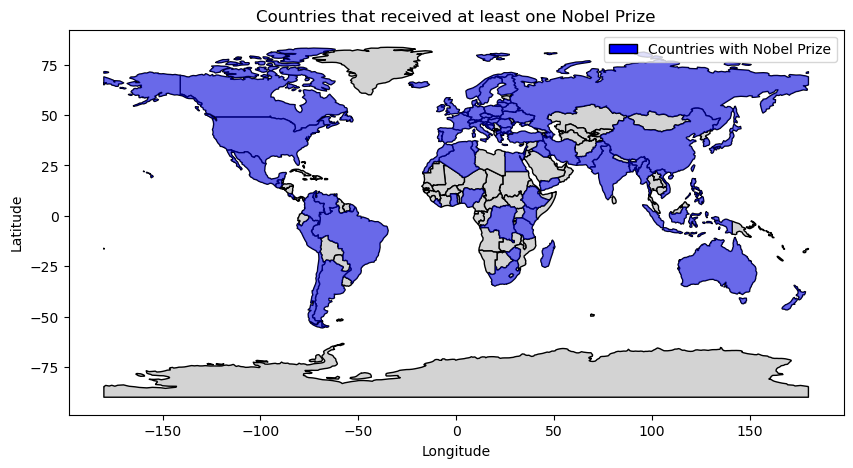

In [106]:
# Get the list of countries from the 'Borncountry' column.
born_countries = filtered_data_copy['Borncountry'].unique()
nobel_countries = set(born_countries) 

# Load the geospatial data of countries from Natural Earth Data.
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')

# Merge the Nobel Prize data with the geospatial data of countries.
nobel_world = world[world['ADMIN'].isin(nobel_countries)]

# Display the map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Display the countries that have received at least one Nobel Prize.
nobel_world.plot(ax=ax, color='blue', alpha=0.5)

# Create a custom legend for countries with Nobel Prize
legend_elements = [Patch(facecolor='blue', edgecolor='black', label='Countries with Nobel Prize')]
ax.legend(handles=legend_elements)

plt.title('Countries that received at least one Nobel Prize')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

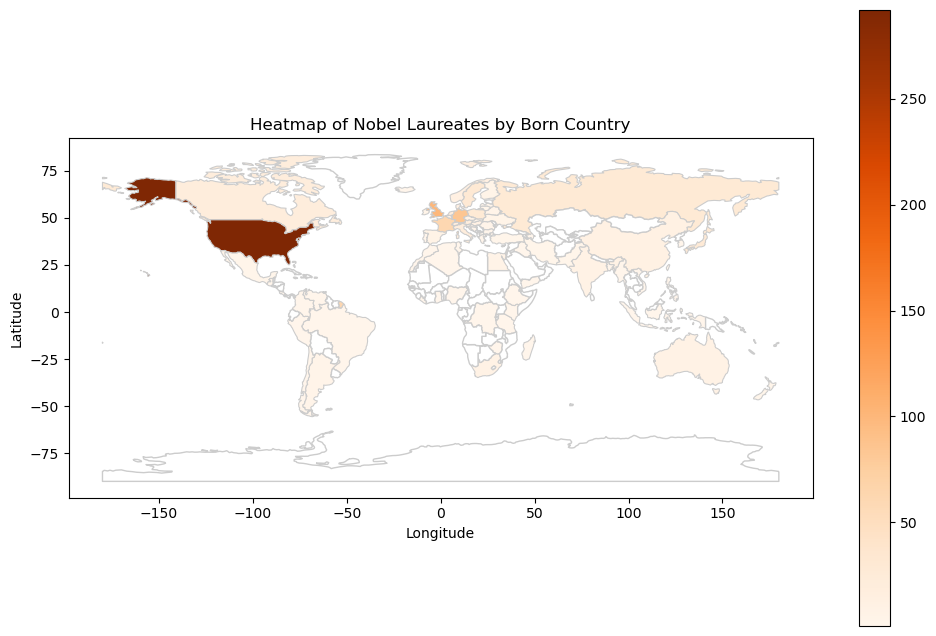

In [107]:
# Count the number of Nobel Laureates born in each country
born_country_counts = filtered_data_copy['Borncountry'].value_counts().reset_index()
born_country_counts.columns = ['ADMIN', 'Count']  # Rename columns for merging

# Load the geospatial data of countries from Natural Earth Data
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')

# Merge the Nobel Laureates data with the geospatial data of countries
world_with_counts = world.merge(born_country_counts, on='ADMIN', how='left')

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Plot countries with Nobel Laureates
world_with_counts.plot(column='Count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot countries with no Nobel Laureates in white
world_with_counts[world_with_counts['Count'].isna()].plot(ax=ax, color='white', edgecolor='0.8')

# Add title and labels
plt.title('Heatmap of Nobel Laureates by Born Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [108]:
len(nobel_world)

81

### Sarah - We can check if there are countries that are particularly talented in a category and win many Nobel Prize in that same category.

Analysis of countries with more than 5 Nobel Prizes in any category :

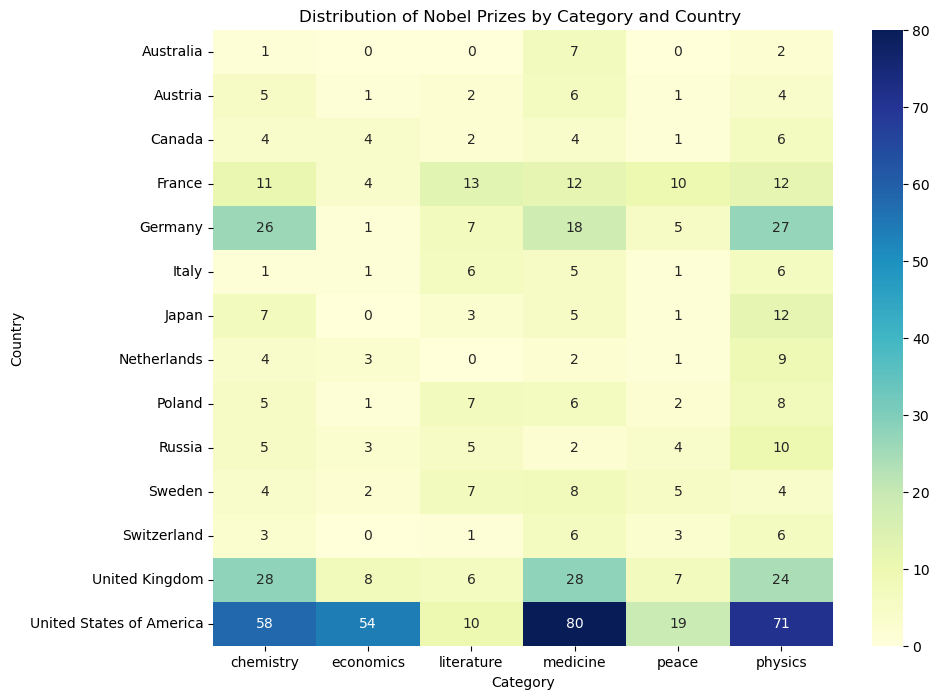

In [109]:
# Group the data by 'Borncountry' and 'Category' and count the occurrences
category_counts = filtered_data_copy.groupby(['Borncountry', 'Category']).size().unstack(fill_value=0)

# Filter countries with less than 5 Nobel Prizes in any category
category_counts_filtered = category_counts[category_counts.max(axis=1) > 5]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(category_counts_filtered, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Category')
plt.ylabel('Country')
plt.title('Distribution of Nobel Prizes by Category and Country ')
plt.show()


### Haim -  Evolution of the distribution of laureate Label by gender

In [110]:
# filtered_data = without org in the gender

In [111]:
filtered_data[filtered_data.loc[:,'Category'] == 'medicine']
category_unique = filtered_data['Category'].unique()
print(category_unique)

['medicine' 'economics' 'peace' 'literature' 'chemistry' 'physics']


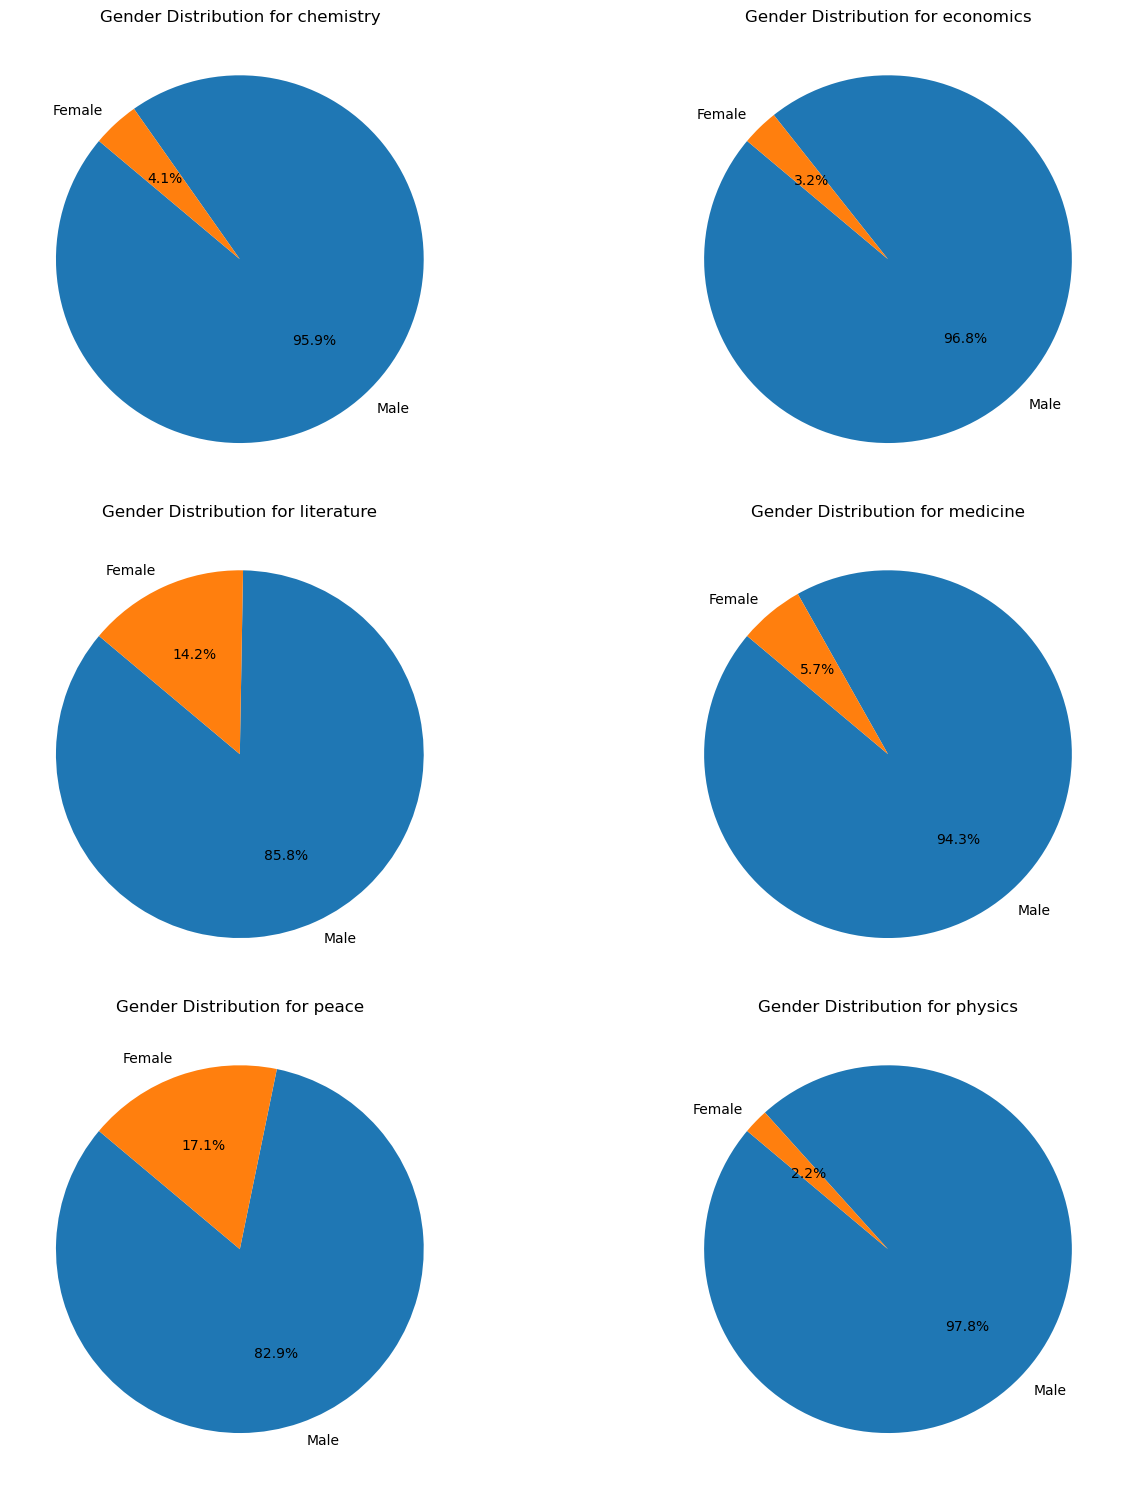

In [112]:
gender_percentages = filtered_data.groupby(['Category', 'Gender']).size().unstack(fill_value=0)
gender_percentages['Total'] = gender_percentages.sum(axis=1)
gender_percentages['Male Percentage'] = gender_percentages['male'] / gender_percentages['Total'] * 100
gender_percentages['Female Percentage'] = gender_percentages['female'] / gender_percentages['Total'] * 100

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Iterate over each category and plot
for i, (category, data) in enumerate(gender_percentages.iterrows()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    sizes = [data['Male Percentage'], data['Female Percentage']]
    labels = ['Male', 'Female']

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Gender Distribution for {category}')

plt.tight_layout()
plt.show()


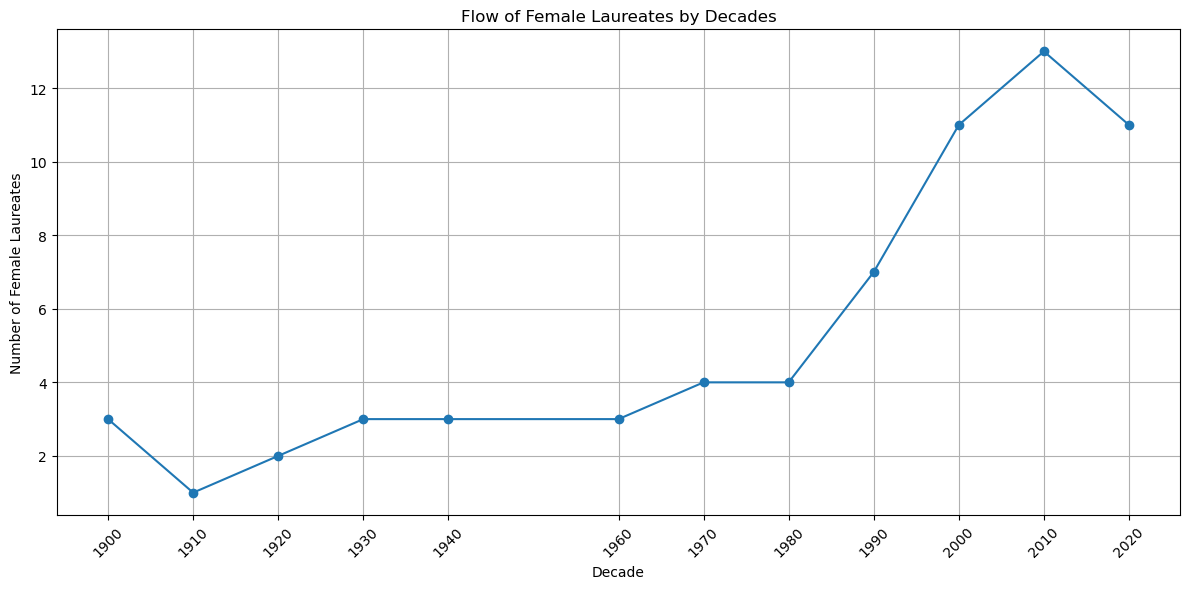

In [113]:
# Filter data for female laureates
female_laureates = nobel_data[nobel_data['Gender'] == 'female']

# Group by decade and count the number of female laureates per decade
female_counts_by_decade = female_laureates.groupby((female_laureates['Year'] // 10) * 10).size()

# Plot the flow of female laureates by decades
plt.figure(figsize=(12, 6))
plt.plot(female_counts_by_decade.index, female_counts_by_decade.values, marker='o', linestyle='-')
plt.title('Flow of Female Laureates by Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Female Laureates')
plt.grid(True)
plt.xticks(female_counts_by_decade.index, rotation=45)
plt.tight_layout()
plt.show()


In [114]:
## Rajouter une autre courbe avec l'evolution des prix nobels chez les hommes en parallele. 

In [115]:
# Pour visualiser le lien entre l'évolution temporelle des prix Nobel et des événements historiques mondiaux, vous pouvez utiliser un graphique linéaire superposé avec des marqueurs pour marquer les événements historiques. Voici comment vous pouvez procéder :
# Préparez vos données en regroupant les prix Nobel par année et en identifiant les événements historiques importants pour chaque année.
# Tracez un graphique linéaire pour montrer l'évolution temporelle des prix Nobel au fil des ans.
# Ajoutez des marqueurs pour les événements historiques sur le graphique pour mettre en évidence les relations potentielles.
# Voici un exemple de code pour réaliser cela 

In [116]:
#Review data from the 1980s. from 2000s. from 2000 - 2023

### Guy - Average by age and category

In [117]:
nobel_data['Born'] = nobel_data['Born'].apply(lambda x: x.replace('/', '-'))
nobel_data['Born'].head() # fixing data

0    17-01-1955
1    1946-00-00
2    21-04-1972
3    29-09-1959
4    1945-00-00
Name: Born, dtype: object

In [118]:
# creating column of year the person who won was born.

In [119]:
def Year_return(date):
    list1=date.split("-")
    if len(list1[0])==4:
        return(list1[0])
    else:
        return list1[2]


nobel_data['Year_born']=nobel_data['Born'].apply(Year_return)
nobel_data['Year_born'].unique() # verifying there isnt something wrong

array(['1955', '1946', '1972', '1959', '1945', '1943', '1961', '1958',
       '1962', '1941', '1947', '1953', '2007', '1987', '1940', '1954',
       '1966', '1942', '1968', '1963', '1960', '1956', '1948', '1931',
       '1967', '1937', '1964', '1965', '1952', '1949', '1935', '1976',
       '1922', '1957', '1944', '1993', '1951', '1936', '1932', '1934',
       '2013', '1938', '1930', '1997', '1929', '1939', '1950', '1923',
       '1933', '1979', '1969', '1974', '1925', '1924', '1928', '1921',
       '1917', '1988', '1919', '1926', '1916', '1927', '1914', '1971',
       '1992', '1918', '1908', '1920', '1915', '1910', '1911', '1913',
       '1905', '1904', '1909', '1906', '1980', '1901', '1902', '1903',
       '1897', '1912', '1894', '1899', '1907', '1898', '1896', '1900',
       '1886', '1895', '1887', '1891', '1888', '1879', '1863', '1892',
       '1889', '1890', '1881', '1882', '1874', '1880', '1875', '1885',
       '1872', '1876', '1869', '1647', '1877', '1865', '1867', '1871',
      

In [120]:
nobel_data['Year_born'] = nobel_data['Year_born'].astype(int)
nobel_data['Year_born'].unique() # verify there isnt somthing not logic

array([1955, 1946, 1972, 1959, 1945, 1943, 1961, 1958, 1962, 1941, 1947,
       1953, 2007, 1987, 1940, 1954, 1966, 1942, 1968, 1963, 1960, 1956,
       1948, 1931, 1967, 1937, 1964, 1965, 1952, 1949, 1935, 1976, 1922,
       1957, 1944, 1993, 1951, 1936, 1932, 1934, 2013, 1938, 1930, 1997,
       1929, 1939, 1950, 1923, 1933, 1979, 1969, 1974, 1925, 1924, 1928,
       1921, 1917, 1988, 1919, 1926, 1916, 1927, 1914, 1971, 1992, 1918,
       1908, 1920, 1915, 1910, 1911, 1913, 1905, 1904, 1909, 1906, 1980,
       1901, 1902, 1903, 1897, 1912, 1894, 1899, 1907, 1898, 1896, 1900,
       1886, 1895, 1887, 1891, 1888, 1879, 1863, 1892, 1889, 1890, 1881,
       1882, 1874, 1880, 1875, 1885, 1872, 1876, 1869, 1647, 1877, 1865,
       1867, 1871, 1873, 1893, 1864, 1883, 1878, 1884, 1870, 1866, 1857,
       1862, 1860, 1868, 1856, 1861, 1858, 1859, 1841, 1844, 1851, 1845,
       1854, 1850, 1853, 1838, 1847, 1830, 1837, 1852, 1829, 1846, 1843,
       1833, 1835, 1832, 1849, 1842, 1828, 1817, 18

In [121]:
nobel_data['Age']=nobel_data['Year']-nobel_data['Year_born']
nobel_data['Age'].unique() # verify there isnt somthing not logic

array([ 68,  77,  51,  64,  78,  80,  62,  65,  61,  82,  75,  67,  69,
        15,  35,  60,  56,  81,  53,  58,  73,  90,  54,  66,  83,  72,
        59,  52,  55,  89,  71,  85,  47,  43,  97,  84,  63,  74,  25,
        96,  76,  70,  10,   2,  17,  16,  57,  50,  79,  32,  39,  42,
        44,  36,  48,  87,  19,  88,  30,  46,  40,  28,  49,   5,  38,
        33,  45,  37,  31,  41, 100,  34,   4, 300,  86])

/Users/sarahbonnan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


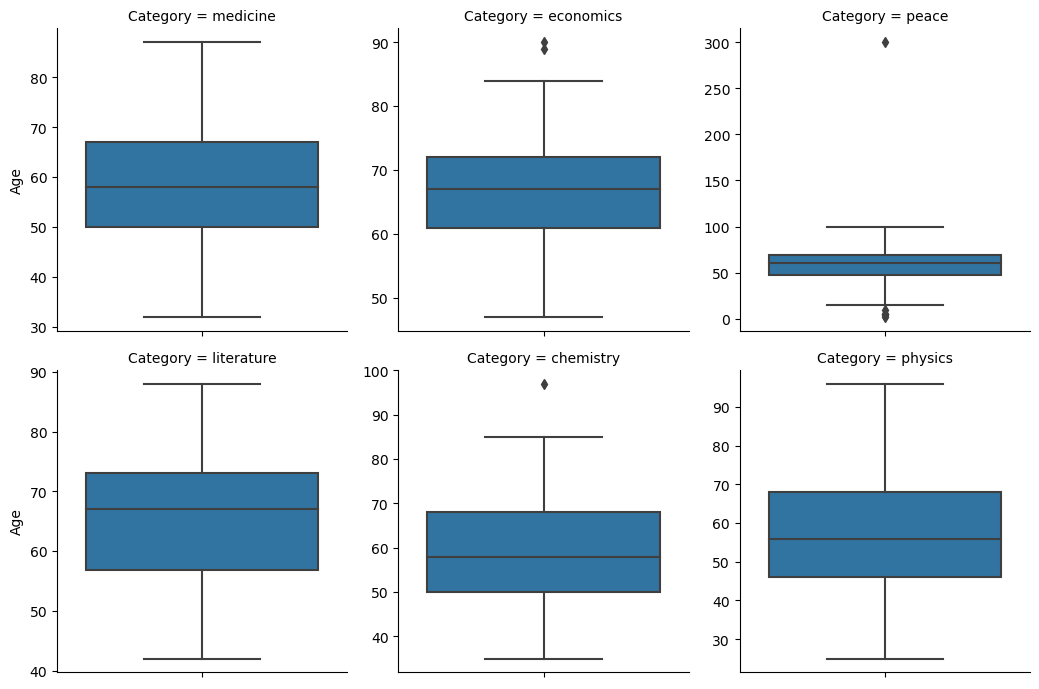

In [122]:
g = sns.FacetGrid(data = nobel_data, col="Category",  col_wrap=3 ,sharex = False, sharey= False, height=3.5)
g.map_dataframe(sns.boxplot, y = 'Age')
plt.show()

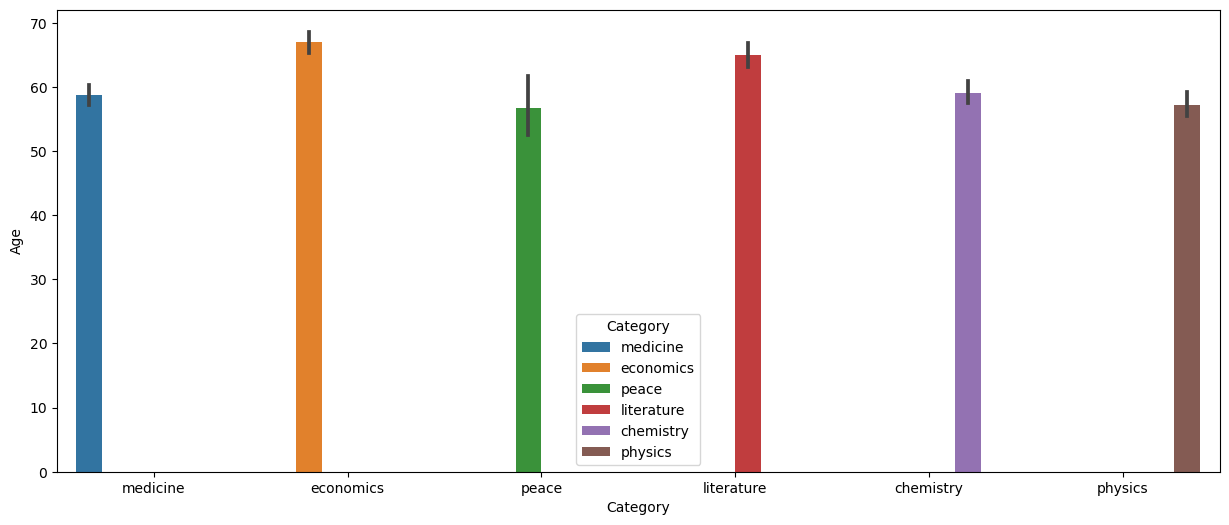

In [123]:
plt.figure(figsize=(15,6))
sns.barplot(data=nobel_data, x="Category", y='Age',hue="Category")
plt.show()

In [ ]:
plt.figure(figsize=(35,6))
sns.barplot(data=nobel_data, x="Borncountry", y='Age',hue="Borncountry")
plt.show()

In [ ]:
g = sns.FacetGrid(data = nobel_data, col="Borncountry",  col_wrap=5 ,sharex = False, sharey= False, height=3.5)
g.map_dataframe(sns.boxplot, y = 'Age')
plt.show()

In [ ]:
g = sns.FacetGrid(data = nobel_data, col="Borncountry", hue="Borncountry", col_wrap=4)
g.map_dataframe(sns.barplot, x="Category", y = "Age")
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

NameError: name 'df_strikes' is not defined

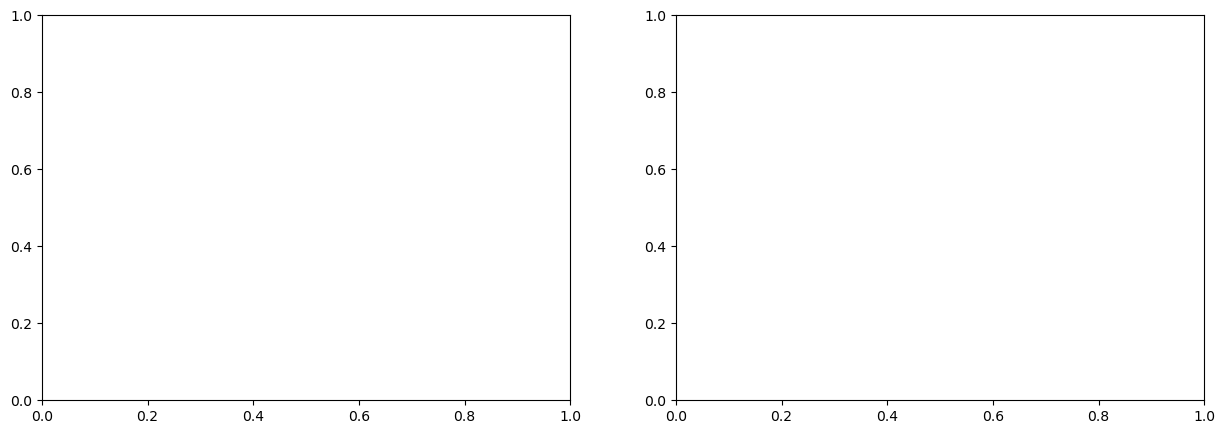

In [127]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax = sns.scatterplot(data = df_strikes.loc[df_strikes["visibility"] == "NIGHT"], y = "height", x = "speed", hue = "aircraft damage", ax = axes[1])